<h4>ver. Dec-2023</h4>

<h2> YOLO v8 from Ultralytics</h2>

👉 [Ultralytics YOLO v8 Document](https://docs.ultralytics.com/)

<h3>YOLO v8 Pose Estimation</h3>

👉 [YOLO v8 Pose Estimation Document](https://docs.ultralytics.com/tasks/pose/)



<br>YOLO v8 Pose Estimation Key Points Map

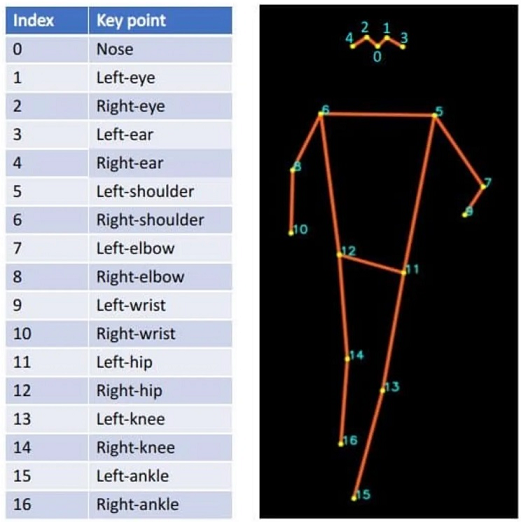
<!-- ![Pose Estimation Keypoints](./PoseKeypoints.jpg) -->
<!-- <img src="PoseKeypoints.jpg"
     alt="Pose Estimation Keypoints"
     style="float: left; margin-right: 10px;"
      width="400" height="auto"/> -->


In [ ]:
# !pip install omegaconf

In [ ]:
# !pip install ultralytics

In [ ]:
# !pip install opencv-contrib-python

<h4>YOLO v8 Pose on Image</h4>

In [ ]:
from ultralytics import YOLO
from omegaconf import OmegaConf

# Load the YOLOv8 model
model = YOLO("./models/yolov8n-pose.pt")
# model = YOLO("./models/yolov8n-face.pt")
# model = YOLO("./models/yolov8n")

# Source image
source = "https://ultralytics.com/images/bus.jpg"

# "save = True" will create folders and will save the result image
# at "./runs/pose/predict/file_name"
model.predict(source, save=True, imgsz=640, conf=0.5)



<h4>YOLO v8 Pose on Video Clip</h4>

In [ ]:
from ultralytics import YOLO
from omegaconf import OmegaConf

# Load the YOLOv8 model
model = YOLO("./models/yolov8n-pose.pt")
# model = YOLO("./models/yolov8n-face.pt")
# model = YOLO("./models/yolov8n")

# Source image
source = "./videos/video.mp4"

# "save = True" will create folders and will save the result video
# at "./runs/pose/predict/file_name"
model.predict(source, save=True, imgsz=640, conf=0.5)

<h4>YOLO v8 Pose on Video Camera</h4>

In [ ]:
import cv2
from ultralytics import YOLO
from omegaconf import OmegaConf

# Load the YOLOv8 model
model = YOLO("./models/yolov8n-pose.pt")

# Capture video camera (laptop)
cap = cv2.VideoCapture(0)

# Loop through the video frames
while (cap.isOpened()):

    # Load a frame from the capture
    success, frame = cap.read()

    if success:
        # Run YOLO model and get the pose estimation data from the frame
        results = model.predict(frame, save=False, imgsz=640, conf=0.5)
        # print(results[0].keypoints.xyn)

        # Extract keypoint
        result_keypoint = results[0].keypoints.xyn.cpu().numpy()[0]
        print(result_keypoint)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frames
        cv2.imshow("YOLO v8 Pose", annotated_frame)

        if (cv2.waitKey(1) == ord('q')):
            break
    else:
        break

# Release the resources and close all windows
cap.release()
cv2.destroyAllWindows()